Code pour le dianostics de maladie



In [2]:
#importation de biblotheque
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # cette biblotheque nous permettra de decoupé nos données en donné d'entrainement et de test 
from sklearn.svm import SVC # elle nous permettra d'implementer l'algorithme de classification 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix # elle nous permettra d'evaluer les performences de notre modele
import seaborn as sns #elle nous permettra de créer de graphique de non donné facilement


In [12]:
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data_diagnostics.ipynb
./data_medcine.ipynb
./.ipynb_checkpoints\data_diagnostics-checkpoint.ipynb
./.ipynb_checkpoints\data_medcine-checkpoint.ipynb
./data\dataset.csv
./data\Symptom-severity.csv
./data\symptom_Description.csv
./data\symptom_precaution.csv


Chargement des données du dataset

In [16]:
df = pd.read_csv('data\dataset.csv') # ce dataset contient les maladies leurs symptomes 
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.describe() # quelques caracteristique de notre dataset 

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [26]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,NaN,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,NaN,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,NaN,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,NaN,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.isna().sum() # le nombre de données null
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [28]:
#remplir les données NaN ou null par zero(0)
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,0,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,3,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df1 = pd.read_csv('data\Symptom-severity.csv') # chargement de la data cette donné ordonne les symptomes et leur niveau de gravité
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [33]:
df1['Symptom'].unique() #listé les symptomes de facon unique
#df1.count()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [31]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,0,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,3,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


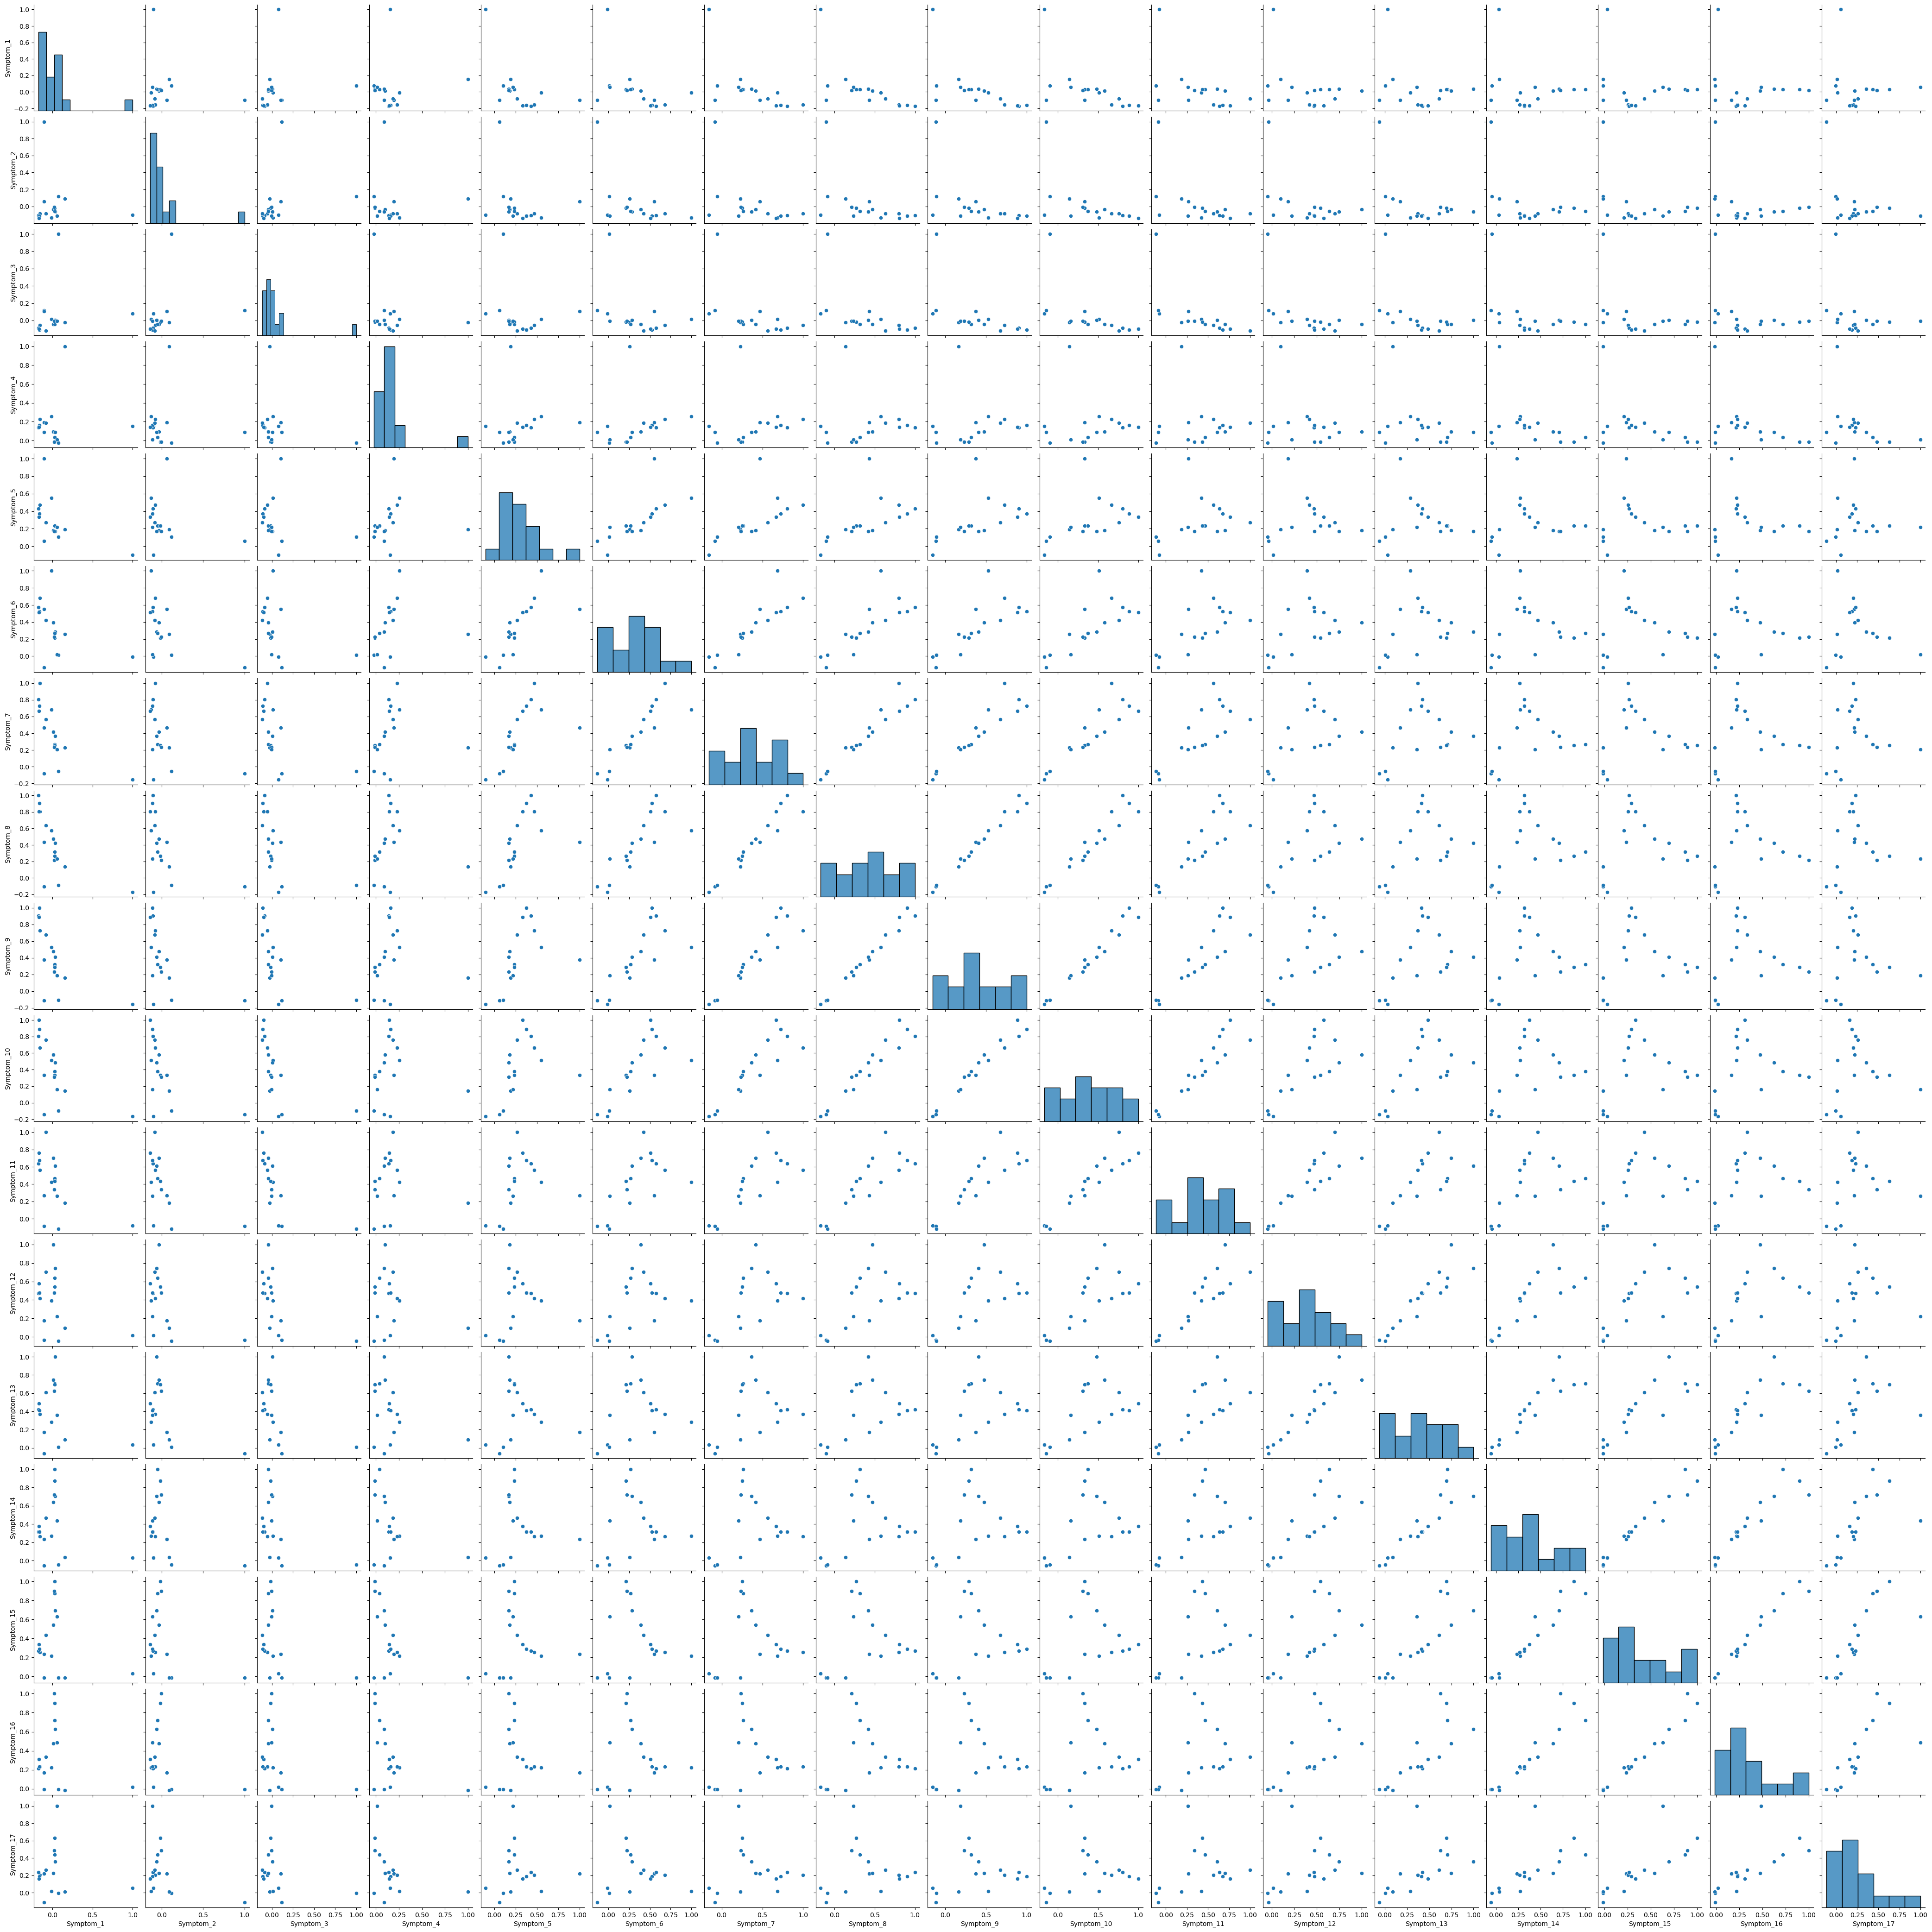

In [37]:
#permet de voire sous forme matricielle les correlation (relation) entre les donnes (entre les symptomes)
sns.pairplot(df.corr())

grace a cette graphique seaborn on constate qu'il existe de forte correlation entre certain symptomes (7 - 6, 8-7,9-8,10-9,11-10,12-11,13-12,14-13,15-14,16-15,17-16)]

# interpretation du visuel
Cette corrélation nous informe qu'au cours d'une analyse, si le symptôme 7 apparaît, il est fort probable que le symptôme 6 apparaisse également, et ainsi de suite

In [42]:
(df[cols] == 0).all()

Disease       False
Symptom_1     False
Symptom_2     False
Symptom_3     False
Symptom_4     False
Symptom_5     False
Symptom_6     False
Symptom_7     False
Symptom_8     False
Symptom_9     False
Symptom_10    False
Symptom_11    False
Symptom_12    False
Symptom_13    False
Symptom_14    False
Symptom_15    False
Symptom_16    False
Symptom_17    False
dtype: bool

In [43]:
df['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [44]:
df['Disease'].unique() #liste de toutes les maladies

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [47]:
#Sélectionnez les caractéristiques dans la colonne Symptômes et étiquetez-les comme colonne Maladie.

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [50]:
# coupage des données avec un ration 80% 20%, 80% des donneés reservé pour l'entrainement et 20% pour les tests, les étiquettes avec shuffle

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4182, 17) (738, 17) (4182,) (738,)


In [51]:
#Initialisation et former un classificateur de vecteurs de support section d'entrainement de notre model choix de model et d'algo : classificateur 

model = SVC()
model.fit(x_train, y_train)

SVC()

In [54]:
prediction = model.predict(x_test) #lancement des prdictions avec les données test

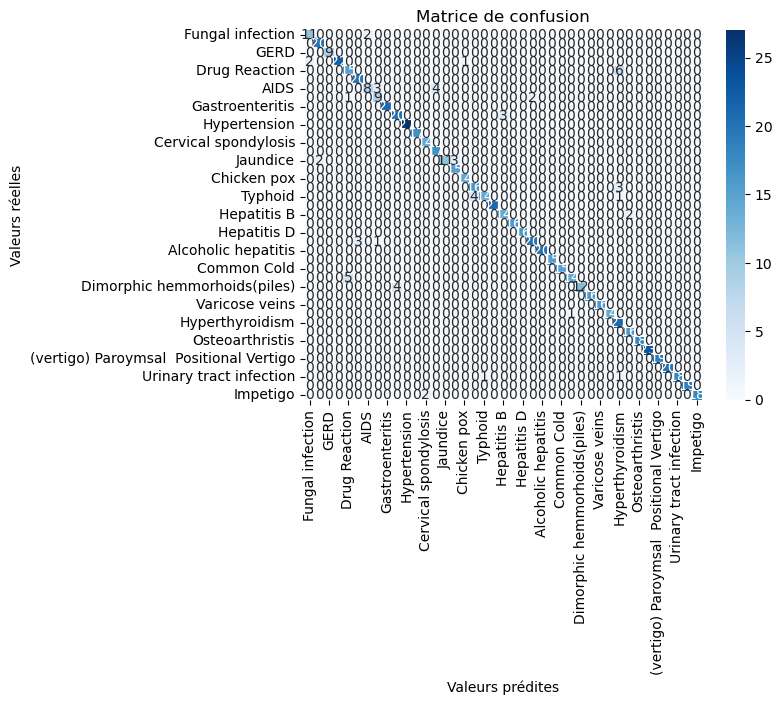

In [56]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')  # annot=True pour afficher les valeurs dans les cellules, cmap='Blues' pour choisir la palette de couleurs, fmt='g' pour formatter les nombres sans décimales
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion')
plt.show()

# matrice de confusion

la matrice de confusion evalue les performances d'un modèle de classification. Elle permet de visualiser la performance du modèle en comparant les valeurs réelles des classes avec les valeurs prédites par le modèle.

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculer la précision
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print(classification_report(y_test, prediction))

# Afficher la matrice de confusion
conf_mat = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(conf_mat)
 

Accuracy: 0.9227642276422764
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.85      0.85      0.85        13
                                   AIDS       0.91      1.00      0.95        20
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      0.88      0.94        25
                                Allergy       0.71      0.71      0.71        21
                              Arthritis       0.87      1.00      0.93        20
                       Bronchial Asthma       0.80      0.53      0.64        15
                   Cervical spondylosis       0.69      0.75      0.72        12
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       0.83      0.87      0.85        23
                            Common Cold       1.00      1.00      1.00        2

 nous avons le resumé de notre prediction 